In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import seaborn as sns


data = pd.read_csv('data/Albuquerque_Final_2022-06-18.csv')

In [3]:
tree_types  = pd.get_dummies(data['common_name'])
condition = pd.get_dummies(data['condition'])

x_data = data[['longitude_coordinate', 	'latitude_coordinate']]
x_data = pd.concat([x_data, tree_types], axis=1)
y_data = condition
y_val = np.zeros(len(y_data))
#need to add loop to assign numbers to y values 
for i in range(len(y_data)):
    if y_data["dead/dying"][i]==1:
        y_val[i] = 1
    if y_data["excellent"][i] == 1:
        y_val[i] = 5
    if y_data["fair"][i] == 1:
        y_val[i] = 3
    if y_data["good"][i] == 1:
        y_val[i] = 4  
    if y_data["poor"][i] == 1:
        y_val[i] = 2

y_val = pd.DataFrame(y_val, columns = ['Y values'])
all_data = pd.concat([x_data, y_val], axis=1)
all_data = all_data.dropna()
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=25)

x_train = train_data.iloc[:, 0:-1]
y_train = train_data.iloc[:,-1:]
x_test = test_data.iloc[:, 0:-1]
y_test = test_data.iloc[:,-1:]


In [4]:
print(y_data["dead/dying"][0])
print(y_data)
print(y_val)

1
      dead/dying  excellent  fair  good  poor
0              1          0     0     0     0
1              0          0     0     0     0
2              1          0     0     0     0
3              1          0     0     0     0
4              0          0     0     1     0
...          ...        ...   ...   ...   ...
2528           0          0     0     1     0
2529           0          0     0     1     0
2530           0          0     0     0     0
2531           0          0     0     0     0
2532           0          0     0     0     0

[2533 rows x 5 columns]
      Y values
0          1.0
1          0.0
2          1.0
3          1.0
4          4.0
...        ...
2528       4.0
2529       4.0
2530       0.0
2531       0.0
2532       0.0

[2533 rows x 1 columns]


                        longitude_coordinate  latitude_coordinate  \
longitude_coordinate                1.000000             0.378566   
latitude_coordinate                 0.378566             1.000000   
Afghan pine                        -0.091465            -0.084953   
American basswood                        NaN                  NaN   
American elm                        0.023886            -0.000282   
...                                      ...                  ...   
Texas red oak                      -0.007215            -0.041655   
Tree of heaven                      0.032623             0.010832   
Velvet ash arizona ash              0.011309            -0.021378   
Vitex                              -0.057925            -0.066322   
White ash                          -0.027101            -0.009820   

                        Afghan pine  American basswood  American elm  \
longitude_coordinate      -0.091465                NaN      0.023886   
latitude_coordinate       -

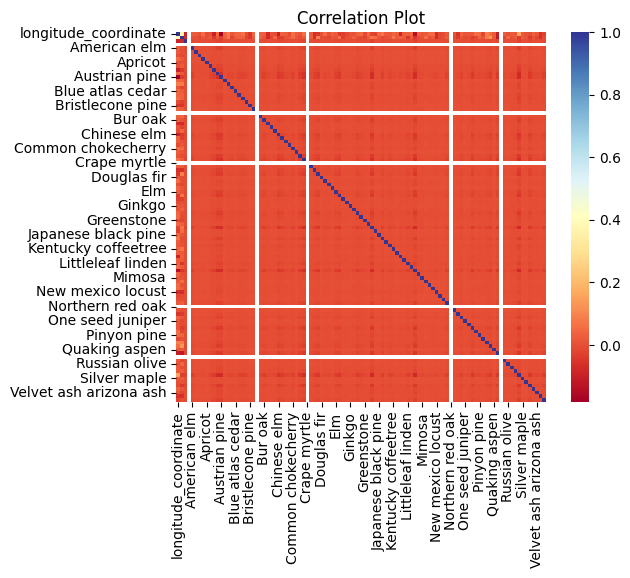

In [5]:
# Compute and print
corr_df= x_train;
cor= corr_df.corr(method='pearson') ;
print(cor)

# Plot
fig_corr, ax_corr =plt.subplots()
plt.title("Correlation Plot")
sns.heatmap(cor, cmap=plt.cm.RdYlBu, square=True, ax=ax_corr)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train= x_train.to_numpy()
x_test = x_test.to_numpy()
# y_train = y_train.astype('int64')


theta = LogisticRegression(penalty='l2', C=1)
theta.fit(x_train, y_train)
coeff = theta.coef_
print(coeff)
threshold = 0.5
y_pred_lg = (theta.predict(x_test)) #> threshold).astype(int)



acc_lg = accuracy_score(y_test, y_pred_lg)
print("Accuracy LG : ", acc_lg)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 3.03446401e-01  9.05235309e-01  4.38263515e-02  0.00000000e+00
  -3.78646283e-01 -1.54667507e-02 -1.50845764e-02 -3.30524959e-02
  -1.52769087e-02 -2.09965357e-01 -1.28648769e-01 -8.27729728e-01
  -7.85296359e-01 -1.59230658e-02  1.81559397e+00 -1.88087512e-01
  -3.09149713e-02 -2.29068874e-01  2.63572571e-01 -1.44461220e-01
   2.75058628e-01 -4.75825779e-02  0.00000000e+00 -9.86046589e-02
   6.43315916e-02 -1.28709841e-01 -5.81074886e-02  2.06175264e-01
  -4.37165623e-01 -4.71177147e-01 -1.40008787e-01  5.07013892e-01
   1.56234724e+00 -1.55675052e-02 -7.44997846e-02  4.35183754e-01
   0.00000000e+00 -6.34532018e-02 -3.49264901e-01 -4.38677739e-02
  -1.54511338e-02 -1.20728810e-01 -1.07637226e-01 -1.58256898e-02
  -3.75976743e-01  3.52555029e-01 -4.49192338e-02 -4.44082528e-02
  -3.08355541e-02 -1.20757830e-01 -2.15377735e-01  4.82380837e-02
  -1.00247777e-01 -4.56545153e-02  1.80432322e-01 -3.11774021e-02
  -3.17319480e-02 -3.61001624e-01 -3.07985254e-02 -2.20449136e-01
   4.78772

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
